Author: Brian Erichsen Fagundes
MSD CS 6017 - Summer - 2024
May - 24 - 2024

Python intro and simple statistics - HW1

Write functions to compute the mean, and standard deviation of a list of data

In [30]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

def compute_mean(data):
    return sum(data) / len(data)

def compute_std(data):
    mean = compute_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    return np.sqrt(variance)

Use scipy.stats.norm to sample from the normal(gaussian) distribution. Compute the mean, and standard deviation of your set of samples using your functions, and with the built in numpy methods. Verify you get the expected results (you know what these values should be if you sample from a normal distribution).

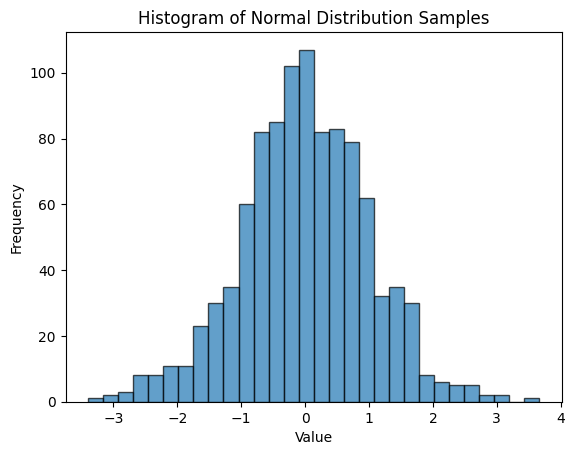

In [31]:
#normal distribution is 0; standard deviation is 1 and 1000 random samples
samples = stats.norm.rvs(loc=0, scale=1, size=1000)

# compute mean and std by using my own methods
custom_mean = compute_mean(samples)
custom_std = compute_std(samples)

# compute mean and std by using in built methods
numpy_mean = np.mean(samples)
numpy_std = np.std(samples)

# asserts that both results are nearly identical
assert np.isclose(custom_mean, numpy_mean, atol=0.01)
assert np.isclose(custom_std, numpy_std, atol=0.01)

# plotting histogram values
plt.hist(samples, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Normal Distribution Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Grab a year's worth of hourly SLC PM2.5 data in CSV form.

Pick one of the monitoring stations from the dataset and perform your analysis from the readings from that station.

Plot the readings from that station over the course of a year

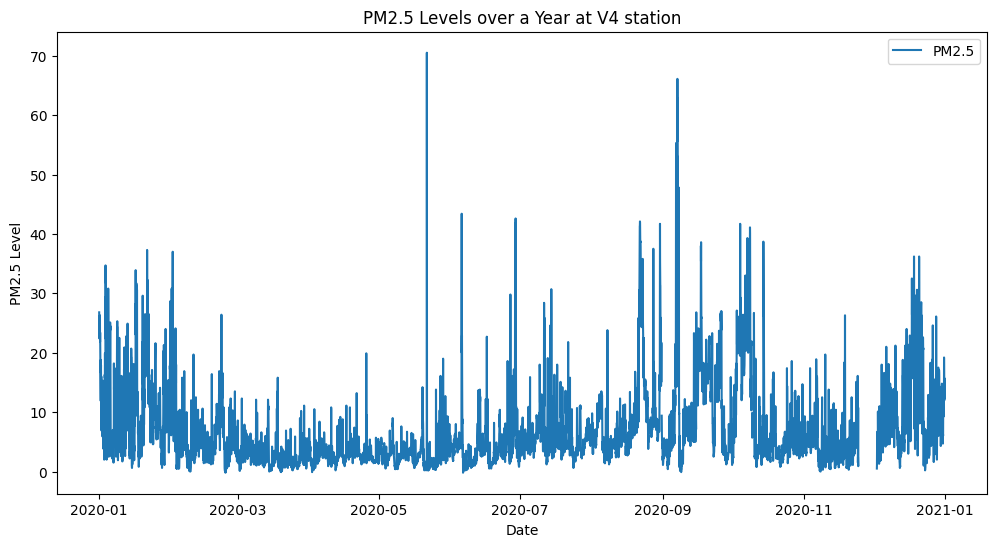

In [32]:
# Load data
df = pd.read_csv('2020-PM2.5.csv', header=2, parse_dates=['Date'], index_col='Date')
# print(df.head())
# print(df.columns)
station_name = 'Unnamed: 22'
station_data = df[[station_name]]

# Plotting yearly data for a specific station
plt.figure(figsize=(12, 6))
plt.plot(station_data.index, station_data[station_name], label='PM2.5')
plt.title(f'PM2.5 Levels over a Year at V4 station')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()
plt.show()

Plot the mean pm2.5 level for each month using a bar chart. Note any insights you can gain from this visualization.

<Figure size 1000x600 with 0 Axes>

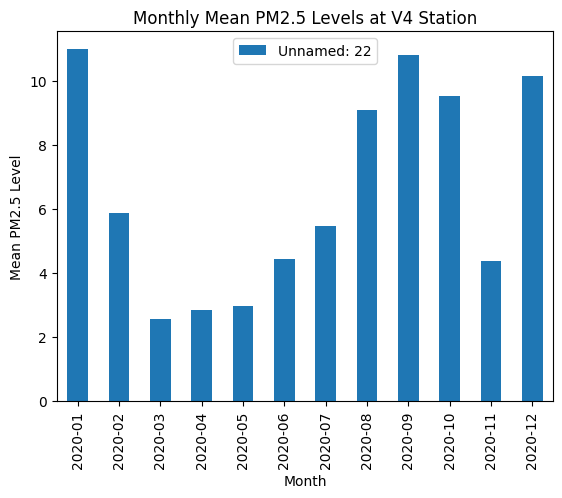

In [33]:
#Plotting monthly means PM2.5 levels
monthly_mean = station_data.resample('ME').mean()

#Convert the index to year - month format
monthly_mean.index = monthly_mean.index.strftime('%Y-%m')

plt.figure(figsize=(10, 6))
monthly_mean.plot(kind='bar')
plt.title(f'Monthly Mean PM2.5 Levels at V4 Station')
plt.xlabel('Month')
plt.ylabel('Mean PM2.5 Level')
plt.show()

# Insights from visualization
# Higher pollution levels in winter months due to temperature inversions

Analysis of the graph: Higher pollution levels in winter months due to temperature inversions. Note that the months of August, November, December and January have the highest amount of pollution when compared to the other months. Surprisingly the month of November shows a lower amount than the other winter months however it still higher than spring months such as March, April and May.

Next, group the data by time of day (by hour), and plot the mean pollution level for each hour. What insights can you draw from this view of the data?

<Figure size 1000x600 with 0 Axes>

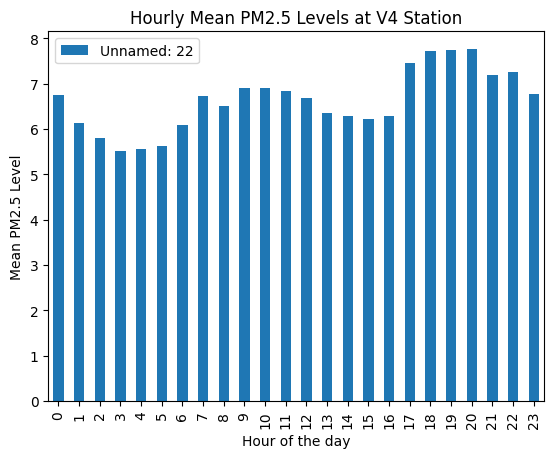

In [34]:
#Plotting hourly mean data
hourly_mean = station_data.groupby(station_data.index.hour).mean()

plt.figure(figsize=(10, 6))
hourly_mean.plot(kind='bar')
plt.title(f'Hourly Mean PM2.5 Levels at V4 Station')
plt.xlabel('Hour of the day')
plt.ylabel('Mean PM2.5 Level')
plt.show()

# Insights from visualization
# Higher pollution levels during mornings and evening rush hours

Analysis: Higher pollution levels during mornings and evening rush hours. Note that in the morning hours around 06:00 the pollution starts to rise up to 10:00 and again the pollution rises from 17:00 to 20:00 and then the pollutions levels start to fall after rush hours.

The mean only gives us a very coarse view of the monthly/hourly data. Use Box and Whisker plots of the monthly and hourly data groupings to provide a more complete view of the data. Does this view provide any additional insights?

/var/folders/vz/hr6jrn1n0ggf1mxbfs500y4m0000gn/T/ipykernel_4715/325003521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['Month'] = station_data.index.month


<Figure size 1000x600 with 0 Axes>

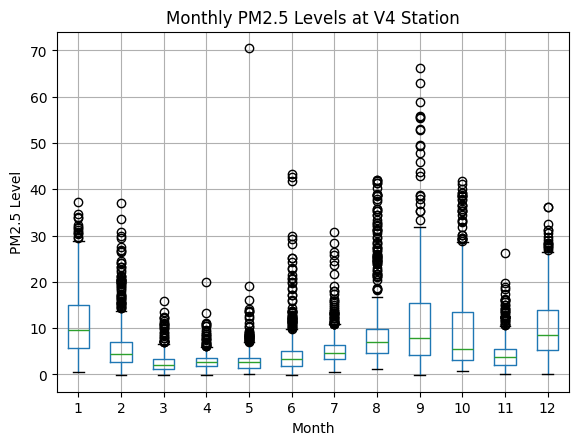

In [35]:
#  More complete view of the data -- monthly
station_data['Month'] = station_data.index.month
plt.figure(figsize=(10, 6))
station_data.boxplot(column=station_name, by='Month', layout=(1, 1))
plt.title(f'Monthly PM2.5 Levels at V4 Station')
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.suptitle('')
plt.show()

Analysis of monthly PM2.5 levels in Vernal, Utah (V4 Station)

The analysis of PM2.5 levels in Vernal, Utah, reveals distinct seasonal patterns and significant monthly variations. These fluctuations can be attributed to both natural and human activities prevalent in the region.

The winter months exhibit an expected rise in pollution due to temperature inversions. These inversions trap pollutants close to the ground, preventing their dispersion. January, being the coldest month of the year in Utah, shows the highest monthly average PM2.5 levels. The cold weather exacerbates the effect of inversions, leading to poor air quality.

July shows a notable spike in pollution levels. This can be attributed to celebrations such as the Fourth of July, which involve fireworks and other festivities that release significant amounts of particulate matter into the air. Additionally, higher temperatures in July can enhance the formation of ground-level ozone, further contributing to pollution levels.

September also displays a unique spike in pollution levels. In Vernal, Utah, September is typically a harvest month for many crops. Agricultural activities, including harvesting and plowing, release a significant amount of dust and particulate matter into the air. The use of machinery and the disturbance of dry soil during these activities significantly contribute to higher PM2.5 levels. Furthermore, the end of summer and early fall can coincide with wildfire season in the region, which could also contribute to elevated pollution levels if fires occur nearby.

/var/folders/vz/hr6jrn1n0ggf1mxbfs500y4m0000gn/T/ipykernel_4715/1895832359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['Hour'] = station_data.index.hour


<Figure size 1000x600 with 0 Axes>

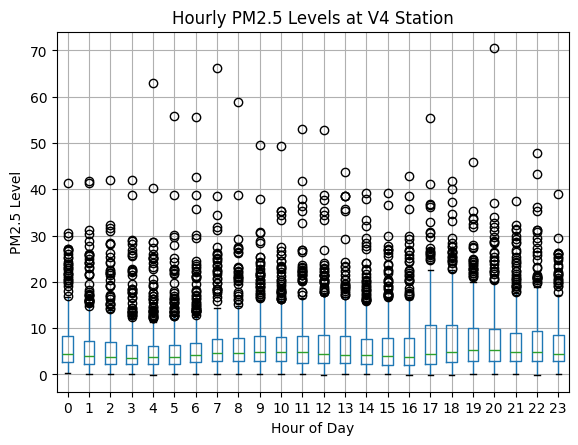

In [36]:
# More complex view of the data -- hourly
station_data['Hour'] = station_data.index.hour
plt.figure(figsize=(10, 6))
station_data.boxplot(column=station_name, by='Hour', layout=(1, 1))
plt.title(f'Hourly PM2.5 Levels at V4 Station')
plt.xlabel('Hour of Day')
plt.ylabel('PM2.5 Level')
plt.suptitle('')
plt.show()

Analysis of Hourly Levels of PM2.5 in Vernal, Utah (V4 Station):

A distinct rise in PM2.5 is observed from 0600 to 1000 where these hours coincide with morning commute as people travel to work and school. Increased vehicular traffic leads to higher emissions of particulate matter. During the colder months, residential heating systems are often turned on in the morning, contributing to PM2.5 levels due to the combustion of fossil fuels and wood.

Furthermore, another rise is noticed from 1700 to 2000 where evening commute exacerbates pollution due to high vehicular traffic. In the evening; people tend to cook and use heating systems as well hich can explain the rise of pollution during these hours. As the day cools down, stable atmospheric conditions can trap pollutants near the surface, leading to higher concentration of PM2.5